<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Appendix-visualizing-K-Mode" data-toc-modified-id="Appendix-visualizing-K-Mode-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Appendix visualizing K-Mode</a></span></li></ul></li></ul></div>

# Intro

This notebook accompanies a presentation/workshop on data science 

In [118]:
#Import a load of packages
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## Decision Tree

In [119]:
data = 'GuessWho.csv'
df = pd.read_csv(data, delimiter= ';')
from sklearn.preprocessing import StandardScaler
# df['color_'] = df['color']
# df = pd.get_dummies(data=df, drop_first=True, columns=['Racket','Partner','Windy','Temperature', 'Outlook', 'Humidity', 'Tennis'])

X = df.drop(df[['Unnamed: 0', 'Unnamed: 1' ]], axis=1)
y = df['Unnamed: 1']
ss = StandardScaler()
ss.fit_transform(X)
#K is the (initial) number of points you are looking for



array([[-0.84515425,  1.94935887, -0.64168895, -0.51298918, -0.4472136 ,
        -0.51298918,  1.94935887, -0.51298918, -0.51298918, -0.4472136 ,
        -0.37796447,  1.94935887, -1.18321596, -0.64168895, -0.51298918,
        -0.4472136 , -0.4472136 , -0.51298918],
       [-0.84515425,  1.94935887, -0.64168895, -0.51298918, -0.4472136 ,
        -0.51298918, -0.51298918, -0.51298918, -0.51298918, -0.4472136 ,
        -0.37796447, -0.51298918, -1.18321596,  1.55838744, -0.51298918,
        -0.4472136 ,  2.23606798, -0.51298918],
       [-0.84515425,  1.94935887, -0.64168895, -0.51298918, -0.4472136 ,
        -0.51298918, -0.51298918, -0.51298918, -0.51298918, -0.4472136 ,
        -0.37796447,  1.94935887, -1.18321596,  1.55838744, -0.51298918,
        -0.4472136 , -0.4472136 , -0.51298918],
       [ 1.18321596, -0.51298918, -0.64168895, -0.51298918, -0.4472136 ,
        -0.51298918, -0.51298918,  1.94935887, -0.51298918, -0.4472136 ,
        -0.37796447,  1.94935887, -1.18321596,  1.558

In [120]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'WideMouth', 'Spectacles', 'BigLips',
       'RedHair', 'Beard', 'Moustache', 'Balt', 'Hat', 'BlueEyes', 'BrownHair',
       'LongHair', 'WhiteHair', 'Smile', 'BigEyebrows', 'Blush', 'BlackHair',
       'BlondHair', 'Female'],
      dtype='object')

In [121]:
df.head()

,Unnamed: 0,Unnamed: 1,WideMouth,Spectacles,BigLips,RedHair,Beard,Moustache,Balt,Hat,BlueEyes,BrownHair,LongHair,WhiteHair,Smile,BigEyebrows,Blush,BlackHair,BlondHair,Female
0,Sam,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,Joe,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,Paul,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,George,4,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,Philip,5,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0


In [138]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy')

clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

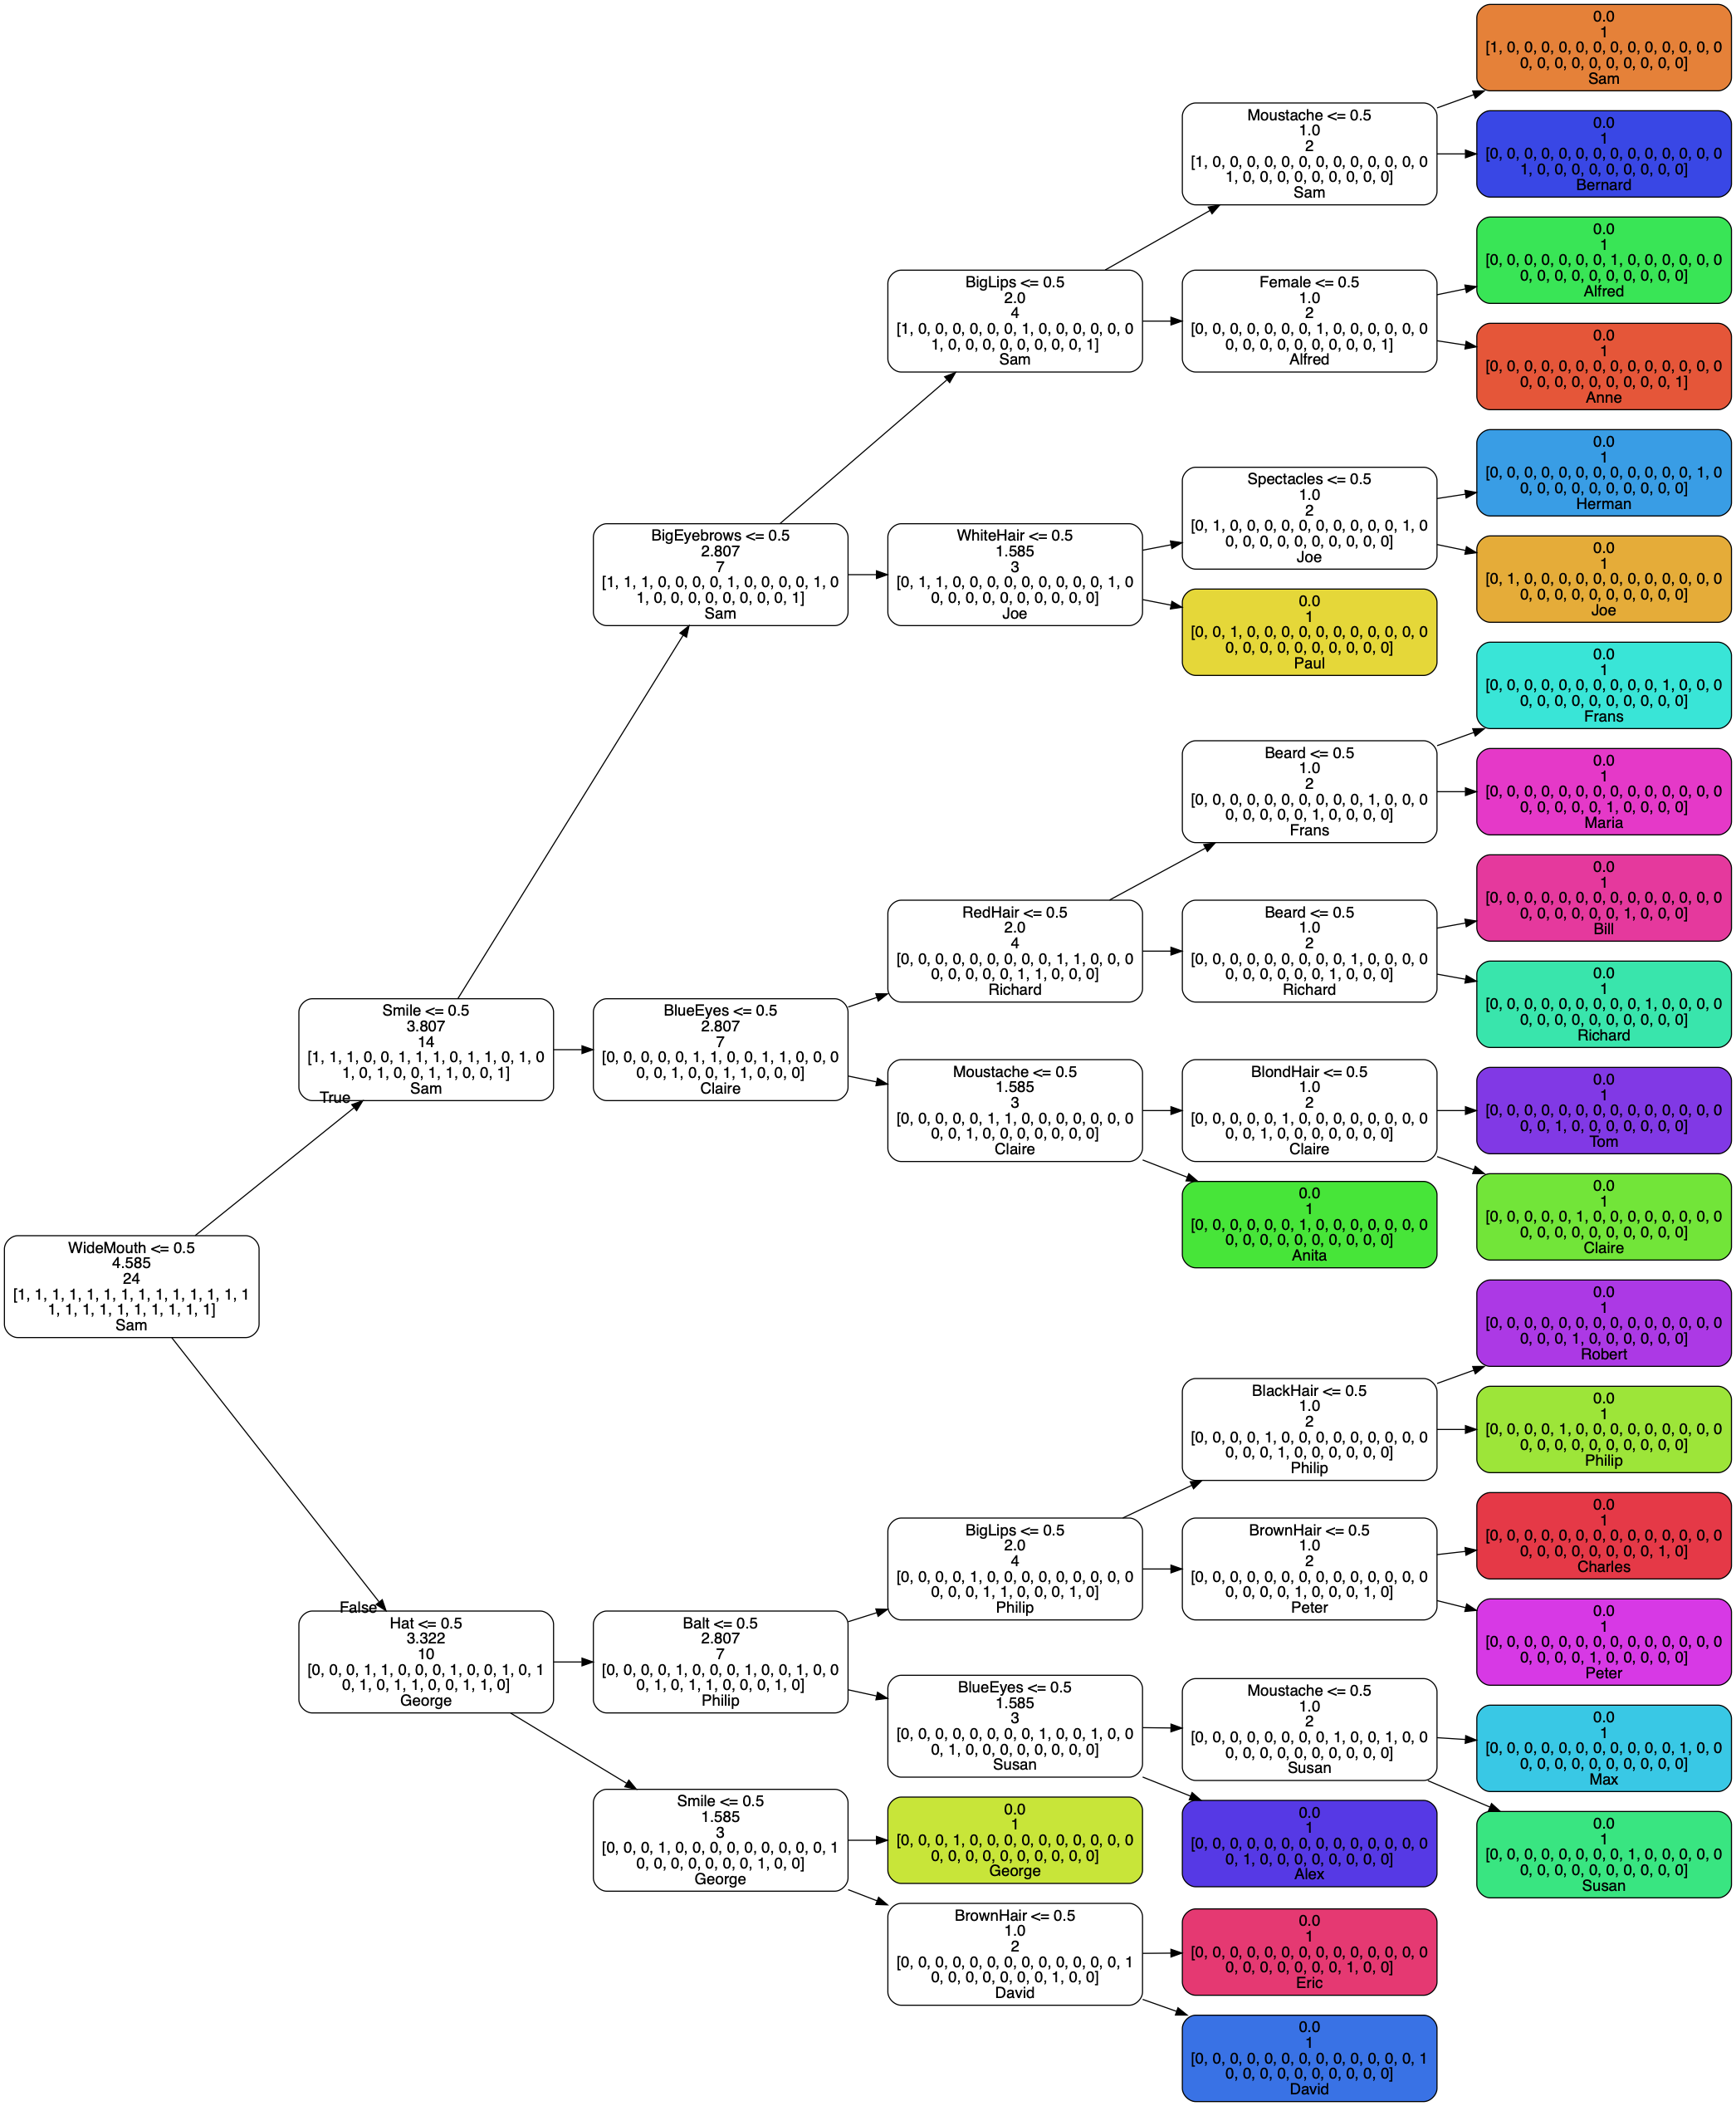

In [139]:
#Print Decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
#from sklearn.tree import export_graphviz
import pydotplus
import pydot


dot_data = StringIO()  

tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False, feature_names=X.columns.values,
                class_names=df['Unnamed: 0'],
    label=None, rotate=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#tree.export_graphviz(clf, out_file='tree.dot')
Image(graph.create_jpg())  
graph.write_gif('treetennis.gif')
Image(graph.create_png())  

In [124]:
#Print Decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
import pydot
import re


dot_data = StringIO()  

tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False, feature_names=X.columns.values,
                class_names=df['Unnamed: 0'],
                label=None, rotate=True)  

# PATH = r'C:\Users\KO5804\dot_data'
PATH= '/Users/maartenk/Documents/git/dot_data'
# f = pydot.graph_from_dot_file(PATH).to_string()
f = pydotplus.graph_from_dot_file(PATH).to_string()
# f = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+, [0-9]+\])', '', f)
# f = re.sub('(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+, [0-9]+\])\\\\n', '', f)

# with open('dot_data', 'w') as file:
#     file.write(f)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# #tree.export_graphviz(clf, out_file='tree.dot')
# Image(graph.create_jpg())  
# graph.write_gif('GuessWhoTree.gif')
# Image(graph.create_png())  

 
# https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier

0    digraph Tree {\nrankdir=LR;\nnode [color="blac...
^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


AttributeError: 'NoneType' object has no attribute 'to_string'

In [125]:
pd.Series(dot_data.getvalue).to_string().stringIO()

AttributeError: 'str' object has no attribute 'stringIO'

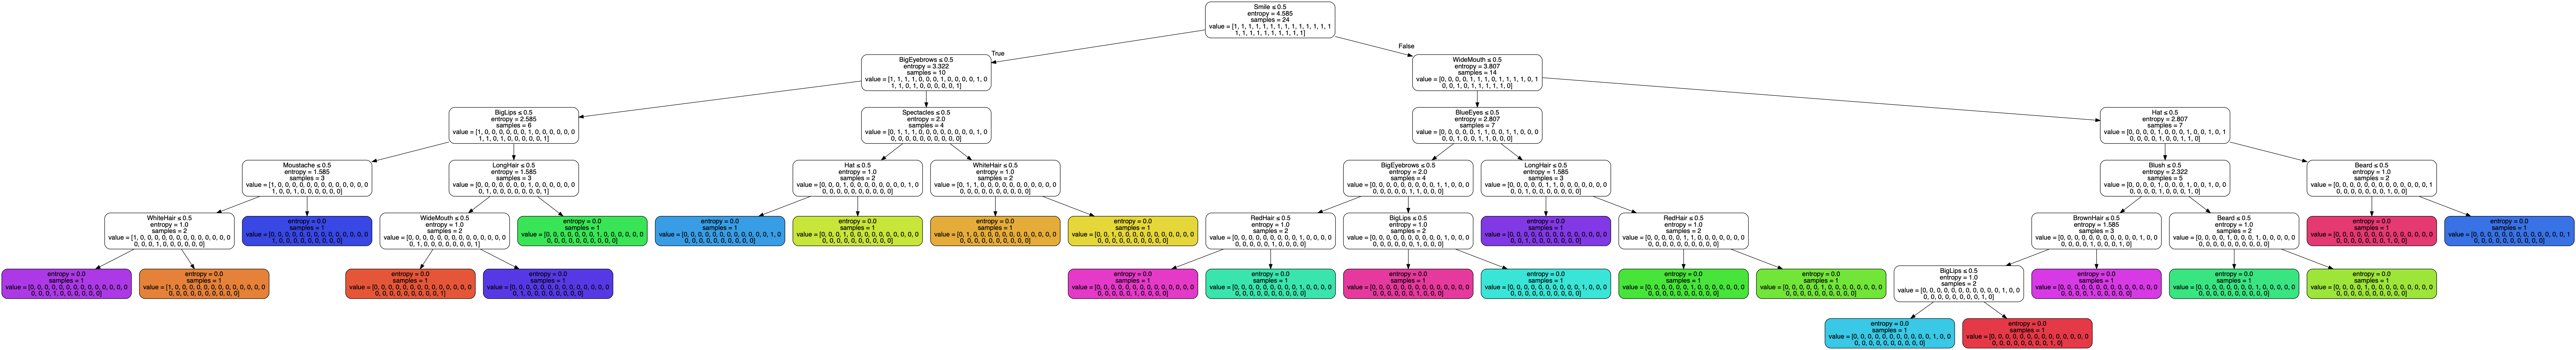

In [126]:
#Print Decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
#from sklearn.tree import export_graphviz
import pydotplus
import pydot


dot_data = StringIO()  

tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns.values)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#tree.export_graphviz(clf, out_file='tree.dot')
Image(graph.create_jpg())  
graph.write_gif('treetennis.gif')
Image(graph.create_png())

In [127]:
from sklearn.tree.export import export_text
r = export_text(clf, feature_names=X.columns.tolist())

In [130]:
from sklearn.tree.export import export_text
r = export_text(clf, feature_names=['WideMouth', 'Spectacles', 'BigLips', 'RedHair', 'Beard',
       'Moustache', 'Balt', 'Hat', 'BlueEyes', 'BrownHair', 'LongHair',
       'WhiteHair', 'Smile', 'BigEyebrows', 'Blush', 'BlackHair',
       'BlondHair', 'Female'])

In [131]:
from pprint import pprint
pprint(r)

('|--- Smile <= 0.50\n'
 '|   |--- BigEyebrows <= 0.50\n'
 '|   |   |--- BigLips <= 0.50\n'
 '|   |   |   |--- Moustache <= 0.50\n'
 '|   |   |   |   |--- WhiteHair <= 0.50\n'
 '|   |   |   |   |   |--- class: 18\n'
 '|   |   |   |   |--- WhiteHair >  0.50\n'
 '|   |   |   |   |   |--- class: 1\n'
 '|   |   |   |--- Moustache >  0.50\n'
 '|   |   |   |   |--- class: 15\n'
 '|   |   |--- BigLips >  0.50\n'
 '|   |   |   |--- LongHair <= 0.50\n'
 '|   |   |   |   |--- WideMouth <= 0.50\n'
 '|   |   |   |   |   |--- class: 24\n'
 '|   |   |   |   |--- WideMouth >  0.50\n'
 '|   |   |   |   |   |--- class: 16\n'
 '|   |   |   |--- LongHair >  0.50\n'
 '|   |   |   |   |--- class: 8\n'
 '|   |--- BigEyebrows >  0.50\n'
 '|   |   |--- Spectacles <= 0.50\n'
 '|   |   |   |--- Hat <= 0.50\n'
 '|   |   |   |   |--- class: 13\n'
 '|   |   |   |--- Hat >  0.50\n'
 '|   |   |   |   |--- class: 4\n'
 '|   |   |--- Spectacles >  0.50\n'
 '|   |   |   |--- WhiteHair <= 0.50\n'
 '|   |   |   |   |--- 

## Appendix visualizing K-Mode 

In [133]:

from kmodes import kmodes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)

km = kmodes.KModes(n_clusters=5, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(X)
df['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn X into two columns with PCA
plot_columns = pca.fit_transform(X)
plot_centroids = pca.fit_transform(km.cluster_centroids_)


# Plot based on the two dimensions, and shade by cluster label

plt.scatter(x=plot_centroids[:,1], y=plot_centroids[:,0], c='red', s=60)
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df["clusters"], s=30)
plt.show()     



FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/shapes.xlsx'

In [302]:
#location of centroids
df__ = pd.DataFrame(km.cluster_centroids_, columns = X.columns)
df__

,coltemp,width,length,diameter,angles,sharp angles,obtus angles,rightangle
0,475,6,6,6,5,0,5,0
1,575,8,6,4,3,2,0,1
2,530,6,5,8,4,0,0,4
3,475,7,6,7,6,0,6,0
4,475,8,8,8,0,0,0,0


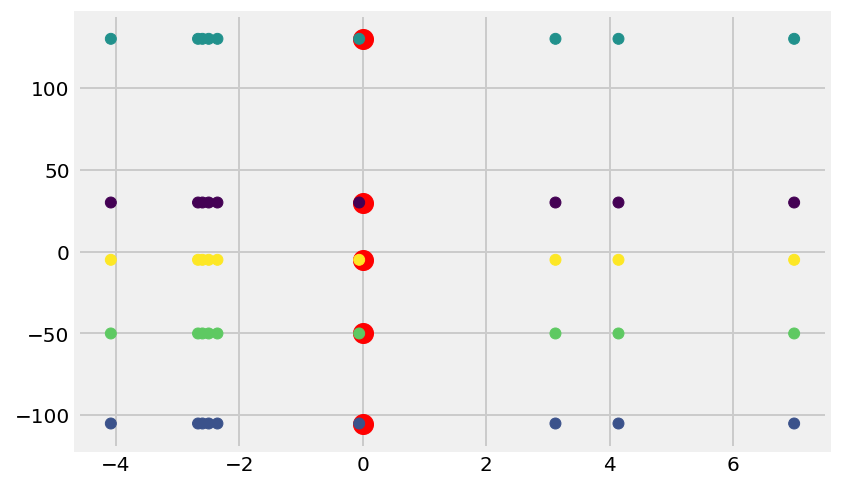

In [314]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)

clf = KMeans(n_clusters=5)#, init='Huang', n_init=5, verbose=0)
clusters = clf.fit_predict(X)
df['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn X into two columns with PCA
plot_columns = pca.fit_transform(X)
plot_centers = pca.fit_transform(clf.cluster_centers_)


# Plot based on the two dimensions, and shade by cluster label

plt.scatter(x=plot_centers[:,1], y=plot_centers[:,0], c='red', s=100)
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df["clusters"], s=30)
plt.show()     




In [311]:
#location of centroids
df__ = pd.DataFrame(clf.cluster_centers_, columns = X.columns)
df__

,coltemp,width,length,diameter,angles,sharp angles,obtus angles,rightangle
0,530.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
1,710.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
2,610.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
3,475.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
4,575.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0


In [312]:
clf.cluster_centers_

array([[530.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [710.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [610.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [475.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [575.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ]])

In [152]:
import pydotplus  # pydot library: install it via pip install pydot
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

# data = load_iris()
# clf = DecisionTreeClassifier()
# clf.fit(data.data, data.target)

export_graphviz(clf, out_file='tree.dot', impurity=False, 
                feature_names=X.columns.values, rotate=True, 
                class_names=df['Unnamed: 0'])

# PATH = '/path/to/dotfile/tree.dot'
PATH= '/Users/maartenk/Documents/git/tree.dot'
f = pydotplus.graph_from_dot_file(PATH).to_string()
f = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+, [0-9]+\])', '', f)
f = re.sub('(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+, [0-9]+\])\\\\n', '', f)

with open('tree_modified.dot', 'w') as file:
    file.write(f)

path_= '/Users/maartenk/Documents/git/tree_modified.dot'
from graphviz import Source
# path = '/path/to/dot_file'
s = Source.from_file(path_)
s.view()
# # graph =   
# graph = pydotplus.graph_from_dot_data(s.getvalue())
# # #tree.export_graphviz(clf, out_file='tree.dot')
# # Image(graph.create_jpg())  
# # graph.write_gif('treetennis.gif')
# # Image(graph.create_png())  

'/Users/maartenk/Documents/git/tree_modified.dot.pdf'

In [114]:
with open('tree_modified.dot', 'w') as file:
    file.write('dot_data')

In [115]:
dot_data_ = open('tree_modified.dot', 'r') 


In [117]:
graph = pydotplus.graph_from_dot_data(dot_data_.getvalue())  
#tree.export_graphviz(clf, out_file='tree.dot')
Image(graph.create_jpg())  
graph.write_gif('treetennis.gif')
Image(graph.create_png())  

AttributeError: '_io.TextIOWrapper' object has no attribute 'getvalue'

In [112]:
dot_data_

<_io.TextIOWrapper name='tree_modified.dot' mode='r' encoding='UTF-8'>